<a href="https://colab.research.google.com/github/moswald75/Finance/blob/main/Whole_State_Absentee_Percent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2
import os
import statsmodels.formula.api as sm
os.listdir()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['.config', 'sample_data']

In [ ]:
#Use if the database above does not have gdrive as an option
from google.colab import drive
drive.mount("/content/gdrive")
os.listdir()
#desired output: ['.config', 'gdrive', 'sample_data']

Mounted at /content/gdrive


['.config', 'gdrive', 'sample_data']

In [ ]:
#os.chdir("../Precinct analysis")
os.chdir("gdrive/MyDrive/Test Databasing/Precinct analysis")
os.listdir()[0:4]
#This should print out the file you search for 

['Total_Prediction.ipynb',
 'Advanced_Prediction.ipynb',
 'Election_Day_Prediction.ipynb',
 'detail.xml']

In [ ]:
df = pd.read_csv('totalElection3.csv')
print(df.keys())

Index(['Unnamed: 0', 'percentTrumpElectionDay', 'percentTrumpAdvanced',
       'percentTrumpAbsentee', 'percentTrumpTotal', 'X', 'Y', 'percentMale',
       'percentFemale', 'percentWhite', 'percentBlack', 'percentHispanic',
       'percentAsianPacific', 'percentAmericanIndian', 'percentOther',
       'percentUnknown', 'Twenty_ThirNinePercent', 'Forty_FifNinePercent',
       'SixtyPlusPercent', 'LastVotedDemocrat', 'LastVotedRepublican'],
      dtype='object')


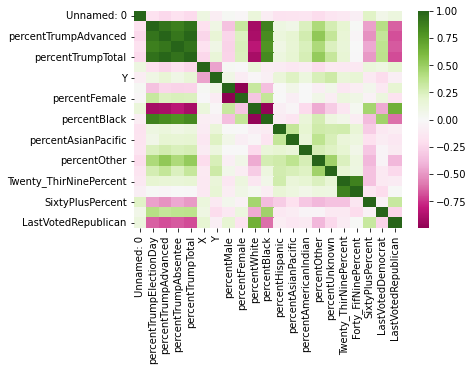

In [ ]:
#Gives a heat map of the correlation between variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), cmap="PiYG")

In [ ]:
import scipy.stats as st
from scipy.stats import chi2
from tqdm import tnrange, tqdm_notebook


def regress(yvar, xvar, prin = 0):
  form = str(yvar) + "~"
  #form += "County1Fulton" + "+" + "difTrumpPercInPerson" + "+"
  for var in xvar:
    form += var + "+"
  #form += "0"
  form = form[0:-1]
  result = sm.ols(formula= form, data=df).fit()
  if prin == 1:
    print(result.summary())
    print("R^2: ", result.rsquared_adj)
    print("AIC: ", result.aic)
    print("BIC: ", result.bic)
  return result.rsquared
regress('percentTrumpAbsentee', ['percentTrumpTotal'])

0.8732924711600717

In [ ]:
import itertools
#Used to find the best model; xvar = List of x variables, numvar= how many variables you wish to keep
def regsubset(xvar, numvar):
  xoptions = itertools.combinations(xvar, numvar)
  dic = {}
  for op in xoptions:
    dic[regress('percentTrumpAbsentee', op)] = op
  print(dic)
  regress('percentTrumpAbsentee' , dic[max(dic.keys())], 1)
  #Change back to max
  return dic[max(dic.keys())]
xvar = ['X', 'Y', 'percentMale',
       'percentFemale', 'percentWhite', 'percentBlack', 'percentHispanic',
       'percentAsianPacific', 'percentAmericanIndian', 'percentOther',
       'percentUnknown', 'Twenty_ThirNinePercent', 'Forty_FifNinePercent',
       'SixtyPlusPercent', 'LastVotedDemocrat', 'LastVotedRepublican']
regsubset(xvar, 1)
regsubset(xvar, 2)
regsubset(xvar, 3)
regsubset(xvar, 4)
regsubset(xvar, 5)
regsubset(xvar, 6)
regsubset(xvar, 7)
regsubset(xvar, 8)
regsubset(xvar, 9)
regsubset(xvar, 10)

In [ ]:
regsubset(xvar, 14)

{0.7263602929179085: ('X', 'Y', 'percentMale', 'percentFemale', 'percentWhite', 'percentBlack', 'percentHispanic', 'percentAsianPacific', 'percentAmericanIndian', 'percentOther', 'percentUnknown', 'Twenty_ThirNinePercent', 'Forty_FifNinePercent', 'SixtyPlusPercent'), 0.7280073375985499: ('X', 'Y', 'percentMale', 'percentFemale', 'percentWhite', 'percentBlack', 'percentHispanic', 'percentAsianPacific', 'percentAmericanIndian', 'percentOther', 'percentUnknown', 'Twenty_ThirNinePercent', 'Forty_FifNinePercent', 'LastVotedDemocrat'), 0.741099972014277: ('X', 'Y', 'percentMale', 'percentFemale', 'percentWhite', 'percentBlack', 'percentHispanic', 'percentAsianPacific', 'percentAmericanIndian', 'percentOther', 'percentUnknown', 'Twenty_ThirNinePercent', 'Forty_FifNinePercent', 'LastVotedRepublican'), 0.7284952292824025: ('X', 'Y', 'percentMale', 'percentFemale', 'percentWhite', 'percentBlack', 'percentHispanic', 'percentAsianPacific', 'percentAmericanIndian', 'percentOther', 'percentUnknown',

('X',
 'Y',
 'percentWhite',
 'percentBlack',
 'percentHispanic',
 'percentAsianPacific',
 'percentAmericanIndian',
 'percentOther',
 'percentUnknown',
 'Twenty_ThirNinePercent',
 'Forty_FifNinePercent',
 'SixtyPlusPercent',
 'LastVotedDemocrat',
 'LastVotedRepublican')

In [ ]:

df = df[df["percentTrumpAbsentee"] > -2.53740]
#This one is used to grab Standardized residuals for different models
def regress(yvar, xvar, prin = 0): 
  form = str(yvar) + "~"
  #form += "County1Fulton" + "+" + "difTrumpPercInPerson" + "+"
  for var in xvar:
    form += var + "+"
  #form += "0"
  form = form[0:-1]
  result = sm.ols(formula= form, data=df).fit()
  influence = result.get_influence()
  standardized_residuals = influence.resid_studentized_internal
  if prin == 1:
    #print(standardized_residuals)
    #print(result.summary())
    print(result.rsquared_adj)
  df2 = df
  
  df2["Standardized Residuals"] = standardized_residuals
  df2["Prediction"] = result.predict()
  return df2
df2 = regress('percentTrumpAbsentee', xvar = ['Y', 'percentWhite',
       'percentAsianPacific', 'percentAmericanIndian', 
       'percentUnknown', 'LastVotedDemocrat', 'LastVotedRepublican'],prin = 1)
print(df2)
df3 = df2[np.abs(df2["Standardized Residuals"]) > 3][["Unnamed: 0", "Standardized Residuals", 'percentTrumpAbsentee', "Prediction"]]
print(df3)

0.8124960592004916
      Unnamed: 0  percentTrumpElectionDay  ...  Standardized Residuals  Prediction
0              1                -1.111453  ...               -0.638827   -1.158977
1            344                 0.534653  ...                0.821742    0.227248
2            976                -0.954332  ...               -0.619853   -0.701641
3             10                -0.999856  ...               -0.301424   -1.066193
4             11                -1.019084  ...               -2.461405   -0.970667
...          ...                      ...  ...                     ...         ...
1943        2567                -1.264556  ...               -0.474676   -0.956117
1944        2568                -0.974605  ...                1.297266   -0.920474
1945        2569                -1.280226  ...               -1.220185   -1.158402
1946        2570                -1.132227  ...                2.548262   -0.235357
1947        2571                -0.528647  ...                1.3207

Shapiro:  (0.9672569632530212, 1.6351068192030363e-20)
Kolmogorov-Smirnov:  KstestResult(statistic=0.07375216363969361, pvalue=1.4634509857876675e-09)


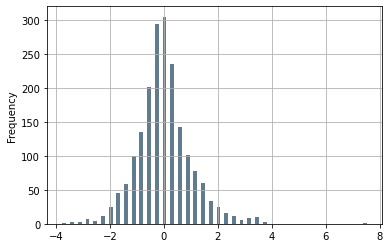

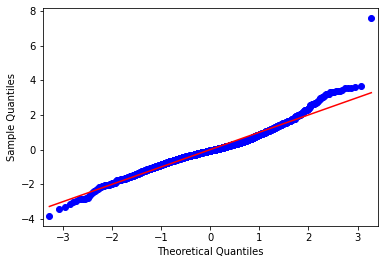

In [ ]:
##Prints Normal Tests
from scipy import stats
from scipy import stats
print("Shapiro: ", stats.shapiro(df2["Standardized Residuals"]))
print("Kolmogorov-Smirnov: ", stats.kstest(df2["Standardized Residuals"], 'norm'))
df2["Standardized Residuals"].plot.hist(grid=True, bins=40, rwidth=0.5,
                   color='#607c8e')

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(df2["Standardized Residuals"], line='s')
pyplot.show()